# Truncated normal

Conditional inference's truncated normal distribution has two advantages over scipy's. First, it uses the state-of-the-art [exponential tilting](https://ieeexplore.ieee.org/document/7408180) method. Second, it allows for concave truncation sets.

c:\users\dbspe\repos\conditional-inference\src\conditional_inference\stats.py:137: RuntimeWarning: divide by zero encountered in log
  return -x * mu + (0.5 * mu ** 2 + np.log(norm.cdf(b, mu) - norm.cdf(a, mu)))
c:\users\dbspe\repos\conditional-inference\src\conditional_inference\stats.py:145: RuntimeWarning: divide by zero encountered in double_scalars
  + (norm.pdf(b, mu) - norm.pdf(a, mu))
C:\Users\DBSpe\anaconda3\envs\conditional-inference\lib\site-packages\scipy\optimize\_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


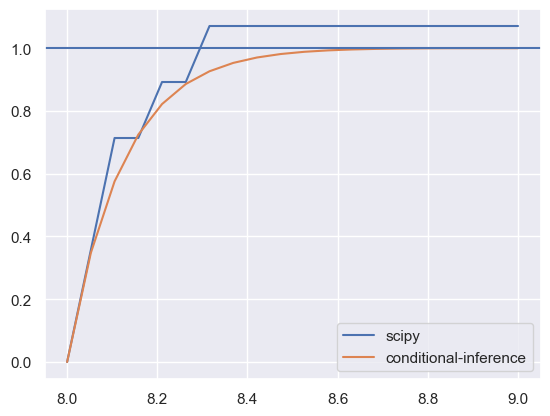

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import norm, truncnorm as scipy_truncnorm

from conditional_inference.stats import truncnorm, quantile_unbiased

sns.set()
x = np.linspace(8, 9, num=20)
ax = sns.lineplot(x=x, y=scipy_truncnorm(8, np.inf).cdf(x), label="scipy")
sns.lineplot(x=x, y=truncnorm([(8, np.inf)]).cdf(x), label="conditional-inference")
ax.axhline(1)
plt.show()

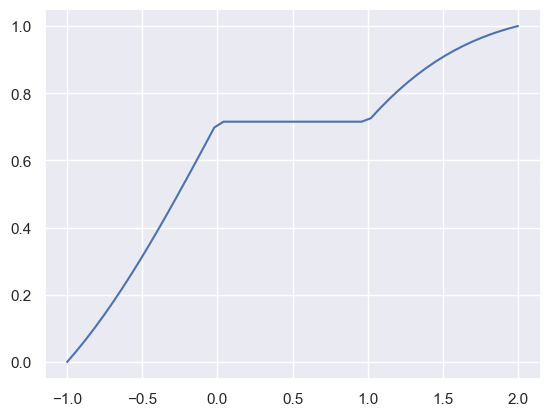

In [2]:
x = np.linspace(-1, 2)
sns.lineplot(x=x, y=truncnorm([(-1, 0), (1, 2)]).cdf(x))
plt.show()

# Quantile unbiased distribution

The quantile-unbiased distribution is the distribution of an unknown mean of a normal distribution given

1. A realized value of the distribution,
2. A truncation set in which the realized value had to fall, and
3. A known variance

In the example below, the realized value is .5, the truncation set is $[0, \infty)$, and the variance (scale) is 1 by default. The interpretation of the CDF plot is, "there is a $CDF(x)$ chance that the mean of the normal distribution from which the realized value (.5) was drawn is less than $x$".

We compare the quantile-unbiased distribution to a normal distribution centered on the realized value.

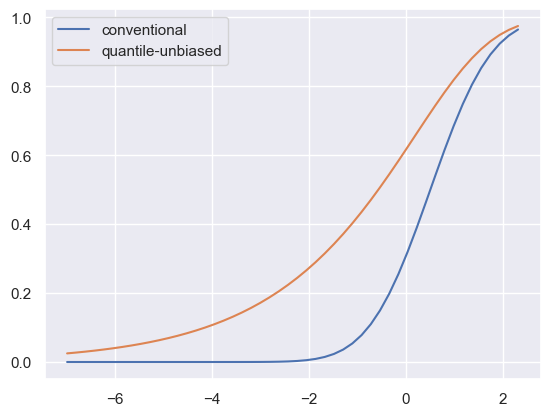

In [3]:
dist = quantile_unbiased(.5, truncation_set=[(0, np.inf)])
x = np.linspace(dist.ppf(.025), dist.ppf(.975))
sns.lineplot(x=x, y=norm.cdf(x, .5), label="conventional")
sns.lineplot(x=x, y=dist.cdf(x), label="quantile-unbiased")
plt.show()

In [4]:
q = .5
print(f"There is a {q} chance that the mean of the normal distribution from which the realized value was drawn is less than {dist.ppf(q)}")

There is a 0.5 chance that the mean of the normal distribution from which the realized value was drawn is less than -0.5725351048077291
